<a href="https://colab.research.google.com/github/matheus-bokus/metodos_numericos/blob/master/Projeto_Sistemas_Lineares_Matheus_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from timeit import default_timer as ti
import matplotlib.pyplot as plt
from numpy.linalg import solve
np.set_printoptions(formatter={'float': lambda x: "{:.4f}".format(x)}) # configura a impressão dos floats

## Metódos Diretos

In [0]:
# forma triangular, sem pivotação
def gauss_ingenuo(A):#método que fará o escalonamento
    A4=np.copy(A)
    n=int(A4.shape[0])
    for k in range(len(A4)):
        for i in range(k+1,n):#i está sempre 1 unidade a frente de k, já q i=k+1
          m=-A4[i][k]/A4[k][k]#m=-valor/pivo
          A4[i] = A4[i] + m * A4[k]# aqui ele faz a multiplicação de toda a linha i pelo fator m achado anteriormente
    b = np.empty([n])
    for i in range(n):
      b[i]=A4[i][n]#Seleciona os termos independentes

    # Resolver sistema Ax = b
    for i in range(1, n):#x[i]
      # definir vetor (solucao) x
      rt = np.empty([n])
      rt[n - 1] = b[n - 1] / A4[n - 1][n - 1]#x=b/a
      for i in range(n - 2, -1, -1):#penúltimo ao último
        soma = 0
        for j in range(i + 1, n):
           soma += A4[i][j] * rt[j]#Somatório dos termos anteriores

        rt[i] = (b[i] - soma) / A4[i][i]#x=(b-somatório dos termos anteriores)/a

  # imprimir solucao
    return rt

In [0]:
# forma triangular, com pivotação
def gauss_esperto(A):#método que fará o escalonamento
    A5=np.copy(A)
    n1=int(A5.shape[0])
    c=np.argmax(np.abs(A5[:,0]))#recebe o indice da linha com o maior termo absoluto
    A5[[0,c]]=A5[[c,0]]
    for k in range(len(A5)):
        for i in range(k+1,n1):#i está sempre 1 unidade a frente de k, já q i=k+1
          m=A5[i][k]/A5[k][k]#m=-valor/pivo
          A5[i] = A5[i] - m * A5[k]# aqui ele faz a multiplicação de toda a linha i pelo fator m achado anteriormente
    b = np.empty([n1])
    for i in range(n1):
      b[i]=A5[i][n1]#Seleciona os termos independentes

    # Resolver sistema Ax = b
    for i in range(1, n1):#x[i]
      # definir vetor (solucao) x
      rt = np.empty([n1])
      rt[n1 - 1] = b[n1 - 1] / A5[n1 - 1][n1 - 1]#x=b/a
      for i in range(n1 - 2, -1, -1):#penúltimo ao último
        soma = 0
        for j in range(i + 1, n1):
           soma += A5[i][j] * rt[j]#Somatório dos termos anteriores

        rt[i] = (b[i] - soma) / A5[i][i]#x=(b-somatório dos termos anteriores)/a

  # imprimir solucao
    return rt

## Metódos Indiretos

### Gauss-Seidel

In [0]:
def teste_seidel(Mat):
  m_teste=np.copy(Mat)
  n_teste=Mat.shape[0]
  soma=0
  diag=0
  for i in range(n_teste):
    soma=0
    for y in range(n_teste-1):
      if i!=y:
        soma+=m_teste[i][y]
    if m_teste[i][i]>soma:
      diag+=1
    else:
      print("A diagonal principal Não é Dominante")
      break
  if diag==n_teste:
    print("A diagonal Principal é dominante")

In [0]:
def gauss_seidel(AB,it, tol, chutes):
    AB2=np.copy(AB)
    x1 = np.array(chutes,dtype=float)
    n=int(AB2.shape[0])
    c_gs=np.argmax(np.abs(AB2[:,0]))#recebe o indice da linha com o maior termo absoluto
    AB2[[0,c_gs]]=AB2[[c_gs,0]]#troca a linha 0 pela linha com maior pivo
    for n in range(it):
        x0 = x1.copy()
        for i in range(AB2.shape[0]):
            x1[i] = AB2[i,-1]
            for j in range(AB2.shape[0]):
                if j!=i:
                    x1[i]-=AB2[i,j]*x1[j]
            x1[i] /= AB2[i,i]
            
        err = np.abs(np.divide(x1 - x0,x1))*100
        if(np.max(err) < tol):
            return x1,err
    return x1,err

## Decomposição LU

In [0]:
def lu(A):
  c_lu=np.argmax(np.abs(A[:,0]))#recebe o indice da linha com o maior termo absoluto
  A[[0,c_lu]]=A[[c_lu,0]]
  upper = A.copy()
  low = np.identity(A.shape[0])
  n = upper.shape[0]-1
  for i in range(n):
    pivo = upper[i,i]
    for k in range(i+1,A.shape[0]):
      m = upper[k,i]/pivo
      low[k,i] = m
      upper[k] = upper[k] - upper[i]*m
  return upper,low

In [0]:
def resolve_lu (mata,vetb):
    vetorB = np.copy(vetb)
    matrizA = np.copy(mata)  # Matriz A
    n=int(matrizA.shape[0])
    vetorY = []
    vetorX = []
    matrizL = []  # Matriz L
    matrizU = []  # Matriz U

    # Criando a matriz L e U nxn
    
    matrizL=np.zeros(matrizA.shape)
    matrizU=np.zeros(matrizA.shape)
    vetorY=np.zeros(matrizA.shape[0])
    vetorX=np.zeros(matrizA.shape[0])

    matrizU,matrizL=lu(matrizA)
    # Resolver o sistema Ly=b
    vetorY[0] = vetorB[0]
    for i in range(1, n):
        soma = 0
        for j in range(i):
            soma += matrizL[i][j] * vetorY[j]
        vetorY[i] = vetorB[i] - soma
    # Resolver o sistema Ux=b
    vetorX[n - 1] = vetorY[n - 1] / matrizU[n - 1][n - 1]
    for i in range(n - 1, -1, -1):
        soma = 0
        for j in range(i + 1, n):
            soma += matrizU[i][j] * vetorX[j]
        vetorX[i] = (vetorY[i] - soma) / matrizU[i][i]
    return vetorX

## Função de Teste

In [0]:
def teste(AB,x1):
  for i in range(AB.shape[0]):
    print(np.dot(AB[i,:-1],x1))
  return

## Método para Comparação

In [0]:
def t_acertos(vet1,vet2):
  taxa_acertos=[]
  for i in range(4):
    taxa_acertos.append(1-((vet1[i]-vet2[i])/vet1[i]))
  return taxa_acertos

# Otimização da Linha de Produção de uma Fábrica de Móveis

Uma fábrica de móveis deseja saber a quantidade de produtos que ela consegue produzir  e preparar para envio no período de uma semana. Na fábrica, exitem 4 estágios na produção dos móveis, sendo elas: Lixamento, tingimento, envernização e embalo, e são produzidos 4 tipos de móveis, sendo eles: cadeiras, mesinhas de centro, mesas e armários. Para calcular o tempo de produção de cada móvel, um funcionário contabilizou o tempo durante uma semana, e obteve, em média, os seguintes resultados:
* 1 cadeira leva 8 minutos para ser lixada, 9 minutos para ser tingida, 10 minutos
para ser envernizada e 6 minutos para ser embalada
* 1 mesinha leva 7 minutos para ser lixada,11 minutos
para ser tingida, 13 minutos para ser envernizada e 10 minutos para ser embalada:
* 1 mesa de jantar leva 10 minutos
para ser lixada, 13 minutos para ser tingida, 14 minutos para ser envernizada e 14 minutos para ser embalada;
* 1 armário leva 20 minutos para ser lixado, 21 minutos para ser tingido, 20 minutos para ser envernizado e 20 minutos para ser embalado. 

Em paralelo, esse mesmo funcionário contabilizou o período disponível em cada estágio da linha de produção, e os resultados, em média, foram:
* A bancada para lixamento fica disponível 26 horas e 30 minutos por semana;
* A bancada para tingir, 32 horas e 50 minutos horas por semana,
* A bancada para envernizar, 36 horas por semana;
* A máquina para embalar fica disponível 28 horas e 30 minutos por semana.


Com esses valores, foi montada a tabela abaixo:

|Etapa\ **Móvel**| Cadeira   | Mesinha | Mesa | Armário |Tempo Disponível|
|-------|------|-----|-----|-----|----|
|Tempo para Lixar(m)               |8|7 |10|20|26h30m|
|Tempo para Tingir(m)              |9 |11 |13|21|32h50m|
|Tempo para Envernizar(m)          |10|13|14|20|21h|
|Tempo para Embalar(m)             |6 |10 |14|20|28h30min|


Tem-se que 26h30min = 1590 minutos, 32h50m =1970 minutos, 36h = 1260 minutos e 28h30m=1710 minutos

Analizando os dados obtidos na tabela acima, esse funcionário montou, de forma a utilizar o máximo de tempo possível em cada estágio, para produzir o maior numero de móveis, o seguinte sistema : 

$$8x +7y +10z+20w = 1590\\
9x + 11y +13z+21w = 1970\\
10x +13y +14z+20w = 2160\\
6x+10y+14z+20w=1710\\$$

Sendo:
* x: o número de cadeiras a serem fabricadas;
* y: o número de mesinhas a serem fabricadas;
* z: o número de mesas a serem fabricadas;
* w: o número de armários a serem fabricados.

De forma a resolver esse sistema, foi montada a matriz aumentada, demonstrada abaixo: 

$$\begin{bmatrix}
8 & 7  & 10 & 20 & 1590\\
9 & 11 & 13 & 21 & 1970\\
10 & 13 & 14 & 20 & 2160\\
6 & 10 & 14 & 20 & 1710\\
\end{bmatrix}$$ 

Com base na matriz aumentada, quantos moveis podem fabricados e embalados
(por semana), com os dados obtidos, de cada tipo para que as bancadas e a máquina de embalagem sejam plenamente utilizadas? 

## Metodologia

Para resolver esse sistema, serão utilizados os Métodos de Gauss Ingênuo, Gauss com Pivotação Parcial, Gauss-Seidel e Decomposição LU, para que seja possível comparar os mesmos, e obter o melhor método para resolução desses sistema.

### Declaração da matriz aumentada

In [0]:
A1=np.array([[8,7,10,20,1590],[9,11,13,21,1970],[10,13,14,20,2160],[6,10,14,20,1710]],dtype=float)

### Metódo de Gauss Ingênuo

Pode-se aplicar o metódo de Gauss Ingênuo nesse sistema, pois nenhum dos valores de pivô das linhas são iguais a zero.
Porèm, como será visto na secção de Resultados, que, devido a alguns cálculos com valores pequenos, este método pode sofrer influência de erros de arrendondamento, que não são notados nos resultados, pois o número de casas decimais está fixo em 4..

In [0]:
ini_gi = ti()
gi=gauss_ingenuo(A1)
fim_gi = ti()
t_gi=fim_gi-ini_gi
print(gi)
print(t_gi)

[78.8710 44.8387 35.8065 14.3548]
0.0008741510000618291


### Metódo de Gauss Com Pivotação Parcial

Utilizando a Pivotação Parcial no metódo de Gauss Ingênuo, agora chamado de Método de Gauss com Pivotação Parcial, foi possível reduzir a quantidade de processamento, através da diminuição dos cálculos feitos com números com muitas casa decimais, deixando resolução mais exata, e menos suscetível a erros de arredondamento, e tendo um resultado tão exato quanto, porém, para este sistema em particular, há poucos arredondamentos, fazendo o tempo de processamento desse método e a sua exatidão serem semelhantes ao anterior.

In [0]:
ini_ge = ti()
ge=gauss_esperto(A1)
fim_ge = ti()
t_ge=fim_ge-ini_ge
print(ge)
print(t_ge)

[78.8710 44.8387 35.8065 14.3548]
0.001147929999660846


### Metódo de Gauss_Seidel

O método de Gauss-Seidel não é adequado para resolve esse problema, pois a diagonal principal da matriz expandida, não é dominante, como mostrado através da função *teste_seidel()*, que realiza o teste da diagonal principal. \\
Portanto, o método não irá convergir, produzindo o valor que não irá ter nenhum sentido para a resolução do sistema.

In [0]:
teste_seidel(A1)

A diagonal principal Não é Dominante


In [0]:
ini_gs = ti()
gs,err1=gauss_seidel(A1,100,0.001,[30,40,10,20])
fim_gs = ti()
t_gs=fim_gs-ini_gs
print(gs)
print(t_gs)
print(err1)

[279671187265107136.0000 -821465597619941376.0000
 -1642617146801696256.0000 1476663445391625984.0000]
0.008433763000084582
[32.4861 32.4861 32.4861 32.4861]


No gráfico abaixo, é mostrado o erro do método de Gauss-Seidel. Porém, devido a ausência de convergência, esse erro se mantém constante.

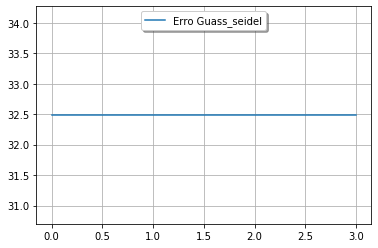

In [0]:
fig, ax = plt.subplots()
ax.plot( err1, label='Erro Guass_seidel')
legend = ax.legend(loc='upper center', shadow=True)
plt.grid(True)
plt.show()

### Decomposição LU



O método da resolução seria o mais adequado para a resolução desse sistema, pois além de calcular os resultados de maneira bastante exata e precisa, permite a modificação da linha dos valores indepentes, sem o custo de processamento de recalcular as matrizes triangular inferior e superior, que é escrita apenas com bases nos valores dos coeficientes das incógnitas do sistema, de forma que, se a fábrica desejasse, poderia estar vários valores, e ver o que lhe traria a maior produção, alternando os tempos das bancadas. \\
Além disso, como já era esperado, o método provou-se ser o mais rápido na resolução desse sistema, como será visto na secção de Resultados.

In [0]:
up,low=lu(A1)

In [0]:
up[:,:-1]

array([[10.0000, 13.0000, 14.0000, 20.0000],
       [0.0000, -0.7000, 0.4000, 3.0000],
       [0.0000, 0.0000, -3.1429, -10.5714],
       [0.0000, 0.0000, 0.0000, -5.6364]])

In [0]:
low

array([[1.0000, 0.0000, 0.0000, 0.0000],
       [0.9000, 1.0000, 0.0000, 0.0000],
       [0.8000, 4.8571, 1.0000, 0.0000],
       [0.6000, -3.1429, -2.1818, 1.0000]])

In [0]:
ini_rlu= ti()
rlu=resolve_lu(A1[:,:-1],A1[:,-1])
fim_rlu = ti()
t_rlu=fim_rlu-ini_rlu
print(rlu)
print(t_rlu)

[78.8710 44.8387 35.8065 14.3548]
0.0010529350001888815


## Resultados

Os resultados obtidos foram 78 cadeiras, 44 mesinhas, 35 mesas e 14 armários produzidos no perído de 1 semana. Nota-se que, devem apenas ser contabilizados os valores inteiros, já que não há sentido contabilizar um móvel que não está terminado.  \\
Devido a ser uma matriz pequena, e cujos valores são todos inteiros, o resultados obtidos foram os mesmos em todos os métodos que convergiram, como já era de se esperar, devido a haver poucos arredondamentos significativos

## Método de Gauss Ingênuo

In [0]:
gi

array([78.8710, 44.8387, 35.8065, 14.3548])

## Método de Gauss Com Pivotação

In [0]:
ge

array([78.8710, 44.8387, 35.8065, 14.3548])

## Método de Gauss-Seidel

In [0]:
gs

array([279671187265107136.0000, -821465597619941376.0000,
       -1642617146801696256.0000, 1476663445391625984.0000])

## Método da Decomposição LU

In [0]:
rlu

array([78.8710, 44.8387, 35.8065, 14.3548])

### Teste dos resultados

Tendo o vetor que contém os resultado de cada método, foi comparada se a multiplicação desses vetores, com a matriz dos seus coeficientes, convergem no vetor dos valores independentes, como mostradoo abaixo:

**Método de Gauss Ingênuo**


In [0]:
teste(A1,gi)

2160.0000000000005
1970.0000000000002
1590.0000000000002
1710.0


**Método de Gauss com Pivotação**

In [0]:
teste(A1,ge)

2160.0
1970.0
1590.0
1710.0


**Método de Gauss-Seidel**

In [0]:
teste(A1, gs)

-1.3457120437993923e+18
3.1368285563687076e+18
9.594207754596823e+18
4096.0


**Método da Decomposição LU**

In [0]:
teste(A1,rlu)

2160.0
1970.0
1590.0
1709.9999999999998


Comparando os resultados obtidos, com o a função *Solve()*, já existente na linguagem Python, percebe-se que a taxa de acertos dos métodos, exceto o de Gauss Seidel, foi de aproximadamente 100%

In [0]:
ini_sol=ti()
sol=solve(A1[:,:-1],A1[:,-1])
fim_sol=ti()
t_sol=fim_sol-ini_sol
sol

array([78.8710, 44.8387, 35.8065, 14.3548])

In [0]:
comp=np.zeros([4,4])
comp=np.array([[gi],[ge],[gs],[rlu]])
taxa_acertos=[]
taxa_acertos.append(sum(t_acertos(gi,sol))/4)
taxa_acertos.append(sum(t_acertos(ge,sol))/4)
taxa_acertos.append(sum(t_acertos(gs,sol))/4)
taxa_acertos.append(sum(t_acertos(rlu,sol))/4)
taxa_acertos=np.dot(100,taxa_acertos)

In [0]:
tempo=[t_gi,t_ge,t_gs,t_rlu]
nome=["Gauss Ingenuo","Gauss Com Pivotação", "Gauss-Seidel", "Decomposição LU"]

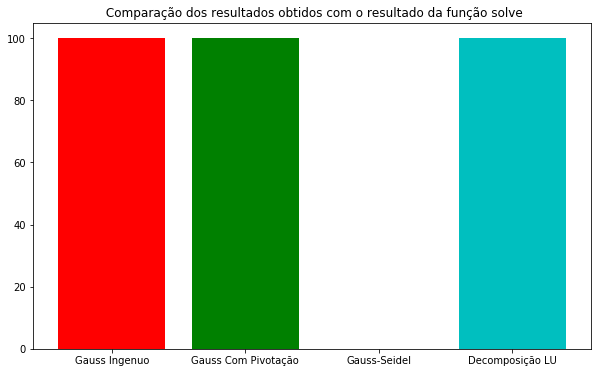

In [0]:
colors = ['r', 'g', 'b', 'c', 'm']
plt.figure(figsize=(10,6))
plt.bar(range(len(taxa_acertos)),taxa_acertos,color=colors)
plt.xticks(range(len(taxa_acertos)),nome)
plt.title(" Comparação dos resultados obtidos com o resultado da função solve")
plt.show()

### Tempo de Execução

In [0]:
print("O Método mais rápido foi {}".format(nome[np.argmin(tempo)]))

O Método mais rápido foi Gauss Ingenuo


**Obs:** Devido ser uma matriz pequena, sem muitas particularidades, como valores pequenos, muitos zeros, ou zeros nas diagonal principal, o valores de diferença de tempo de processamento entre alguns métodos é ínfimo, o que pode acarretar em um método ser mais rápido que o mostrado como anteriormente mais rápido, cada vez que o notebook é executado. Porém, a Decomposição LU foi o método que mais é contabilizado como sendo mais ágil.

Como o método de Gauss-Seidel não converge para essa matriz.o seu tempo de processamento foi o maior, tendo sido limitado pelo número máximo de iterações, que foi 100.

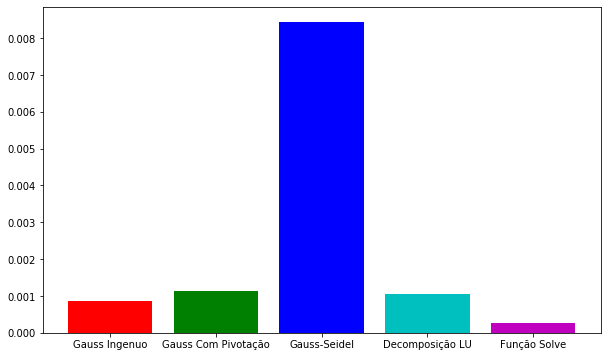

In [0]:
if len(tempo)<5:
  tempo.append(t_sol)
  nome.append("Função Solve")
plt.figure(figsize=(10,6))
plt.bar(range(len(tempo)),tempo,color=colors)
plt.xticks(range(len(tempo)),nome)
plt.show()

## Conclusão

Percebe-se que, o método da Decomposição LU é o mais adequado para resolver o problema, como já se era esperado, pois, foi o mais rápido, em média, e obteve uma resposta exata para o problema, considerando o número de casas decimais imposto. \\
 Este método também, da a possibilidade de se alterar os valores do tempo dsponível, para que se avalie a produção, caso se varie o tempo disponível de cada bancada.

## Referências



1.  **Notável Imóveis**. Etapas de Produção. . Disponível em: <http://www.notavel.ind.br/etapas.asp>, Acesso: 24 de out de 2019.
2.  Lamin, M. R. N. RESOLUÇÃO DE PROBLEMAS MODELADOS COM
SISTEMAS DE EQUAÇÕES LINEARES. Disponível em:<http://www.mtm.ufsc.br/~daniel/7105/Maria_Regina_Nunes_Lamin.PDF>. Acesso 24 de out de 2019

